<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/UTS__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : TRI SUKMA SARAH**

**KELAS : 3 B**

**ABSEN 26**

Deskripsi: Dataset ini berisi data perilaku pengguna kartu kredit. Gunakan untuk
menemukan kelompok pelanggan berdasarkan pola penggunaan.

Langkah tambahan:

o Tangani missing values dan normalisasi fitur numerik.

o Buat fitur baru seperti rasio antara BALANCE dan PURCHASES.

# PENAMBAHAN LIBARRY

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=8a14af743afb5d7675e99e867216177e5bc400c3907e8e6d37e22077bbd0c5a0
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex



# upload dataset ke collab (Tuliskan singkat tentang kondisi awal dataset dan kolom mana yang memiliki missing values)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('/content/drive/MyDrive/Dataset_mesin/UCI_Credit_Card.csv')
df.info()
df.describe()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6           

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Pengecekan missing value

In [ ]:
# Cek missing values
print(df.isnull().sum())

# Imputasi dengan mean untuk numerik
df.fillna(df.mean(), inplace=True)


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Tidak ada data yang memiliki missing value karna semua data memiliki nilai numerik

# membuat fitur baru

In [ ]:
# === Buat fitur baru: rasio tagihan terhadap pembayaran ===
# Gunakan kolom BILL_AMT1 (tagihan bulan 1) dan PAY_AMT1 (pembayaran bulan 1)

df['Bill_Payment_Ratio'] = df['BILL_AMT1'] / (df['PAY_AMT1'] + 1e-5)
print("Fitur baru 'Bill_Payment_Ratio' berhasil dibuat!")


Fitur baru 'Bill_Payment_Ratio' berhasil dibuat!


dengan membuat fitur baru bernama bill_payment_ratio , di amana fitur ini dihitung dari rasio tagihan bulan 1 (bill_amt1)terhadap pembayarab bulan 1 (pay_amt1), dimana ditambhkan konstanta kecil pada pembagi (pay_amt1)untuk mencegah terjadinya pembagian dengan nol.

# pengecekan kolom apakah sudah berhasil di tambhkan atau tidak

In [ ]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Bill_Payment_Ratio'],
      dtype='object')

Dengan menggunakan atribut df.colums, pengecekan dilakaukan untuk mem

# Normalisasi (Standarisasi Data)

In [ ]:
# Pilih fitur numerik saja
num_df = df.select_dtypes(include=['float64','int64'])

# Normalisasi menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

print("Ukuran data setelah normalisasi:", X_scaled.shape)


Ukuran data setelah normalisasi: (30000, 26)


# Clustering

a. K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Tambahkan baris ini untuk melihat hasil
print("Label cluster hasil K-Means:")
print(labels_kmeans[:20])  # tampilkan 20 data pertama sebagai contoh
print("\nJumlah data di tiap cluster:")
print(pd.Series(labels_kmeans).value_counts())


Label cluster hasil K-Means:
[1 1 1 1 1 1 0 2 1 2 1 2 2 1 1 1 1 0 2 2]

Jumlah data di tiap cluster:
1    15861
2    10569
0     3570
Name: count, dtype: int64


b. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Tampilkan hasil cluster DBSCAN
print("Label cluster hasil DBSCAN:")
print(labels_dbscan[:30])  # tampilkan 30 data pertama
print("\nJumlah data di tiap cluster:")
print(pd.Series(labels_dbscan).value_counts())


Label cluster hasil DBSCAN:
[-1 -1  0  1 -1  2 -1  0 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  1  0 -1  3 76 -1
  2  2 -1  0 -1  2]

Jumlah data di tiap cluster:
-1      12128
 0       4705
 1       3977
 2       2829
 5       1983
        ...  
 121        5
 136        5
 135        5
 83         4
 110        3
Name: count, Length: 143, dtype: int64


# Evaluasi Clustering

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("=== Evaluasi Clustering ===")
print("KMeans Silhouette Score:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies–Bouldin Index:", davies_bouldin_score(X_scaled, labels_kmeans))

if len(set(labels_dbscan)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, labels_dbscan))
    print("DBSCAN Davies–Bouldin Index:", davies_bouldin_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN gagal membentuk cluster (semua dianggap noise)")


=== Evaluasi Clustering ===
KMeans Silhouette Score: 0.15611493236546403
KMeans Davies–Bouldin Index: 1.8386896479741057
DBSCAN Silhouette Score: -0.2772111724353092
DBSCAN Davies–Bouldin Index: 1.836683813642679


# Visualisasi 2D (PCA)

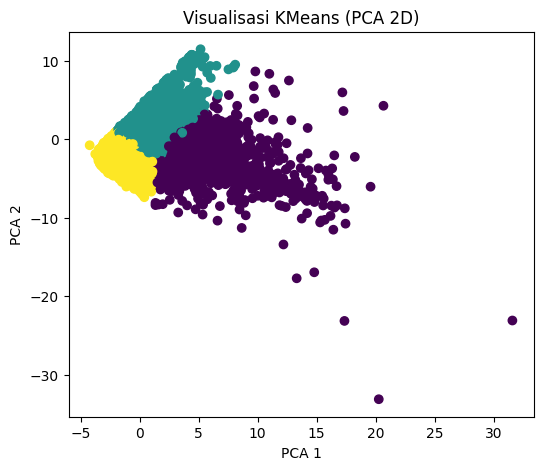

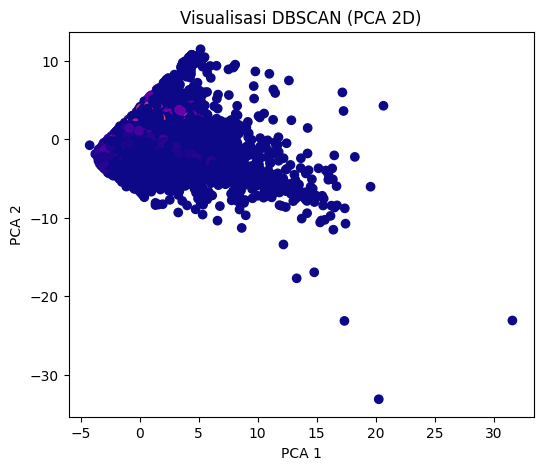

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi KMeans
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("Visualisasi KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Visualisasi DBSCAN
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='plasma')
plt.title("Visualisasi DBSCAN (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


penjelasan k means:
Kalster ungu tua : menandakan kelompok data terbesar dan memiliki penyebarab paling luas, mencakup sebagian besar data dengan klaster lainnya.

klaster hijau Tosaka : kelompok ini menunjukkan klaster yang cukup terpisah, dimana untuk mengidentifikasi bahwa ada sekolompok nasabah yang memiliki karakteristik yang jelas berbeda dan terpusat

klaster kuning : menunjukan klates terkecil yang paling terpisah . dimana kelompok ini mewakiki sekolompok kecil nasabah yang karkteristiknya paling ekstrem atau unik dibandingkan dengan kalster lainnya .

DBSCAN : Warna gelap yang dominan ini mewakili klaster noise . visualisasi ini memperkuat hasil evalusi yang mengidentifikasikan DBSCAN tidak evaluasi yang mengidentifikasi DBSCAN tidak efektif memisahkan data dalam representasi.

# Approximate Nearest Neighbor (ANN)

In [ ]:
from annoy import AnnoyIndex

dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Masukkan semua data
for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])

ann.build(10)  # bangun 10 pohon

# Pilih beberapa query point
query_points = [10, 100, 500, 1000, 1500]

# Temukan tetangga terdekat
for q in query_points:
    neighbors, distances = ann.get_nns_by_item(q, 5, include_distances=True)
    print(f"\nQuery Index: {q}")
    for n, d in zip(neighbors, distances):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster(KMeans): {labels_kmeans[n]}")



Query Index: 10
Neighbor Index: 10 | Distance: 0.0000 | Cluster(KMeans): 1
Neighbor Index: 5405 | Distance: 1.4149 | Cluster(KMeans): 1
Neighbor Index: 2899 | Distance: 1.9677 | Cluster(KMeans): 1
Neighbor Index: 5918 | Distance: 2.0945 | Cluster(KMeans): 2
Neighbor Index: 12881 | Distance: 2.1393 | Cluster(KMeans): 1

Query Index: 100
Neighbor Index: 100 | Distance: 0.0000 | Cluster(KMeans): 2
Neighbor Index: 1330 | Distance: 0.7917 | Cluster(KMeans): 2
Neighbor Index: 895 | Distance: 0.7979 | Cluster(KMeans): 2
Neighbor Index: 479 | Distance: 0.7999 | Cluster(KMeans): 2
Neighbor Index: 3196 | Distance: 0.8310 | Cluster(KMeans): 2

Query Index: 500
Neighbor Index: 500 | Distance: 0.0000 | Cluster(KMeans): 1
Neighbor Index: 4357 | Distance: 0.7705 | Cluster(KMeans): 1
Neighbor Index: 10148 | Distance: 1.7627 | Cluster(KMeans): 1
Neighbor Index: 2810 | Distance: 1.9390 | Cluster(KMeans): 1
Neighbor Index: 7275 | Distance: 2.0085 | Cluster(KMeans): 1

Query Index: 1000
Neighbor Index: 1

menampilkan Indeks Tetangga, Jarak Euclidean antara tetangga dan titik kueri, serta Klaster K-Means dari masing-masing tetangga, yang bertujuan untuk memverifikasi bahwa tetangga terdekat cenderung berasal dari klaster yang sama.